In [6]:
import pandas as pd
import mplfinance as mpf

file_path = "D:\\Prabodh\\python For Trading\\csv_files\\Infy_5Y_merged_data_cleaned.csv"
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
print(df.head())

daily = df.copy()

weekly = df.resample('W').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

monthly = df.resample('ME').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})


one_year_start = pd.Timestamp('2024-04-09')
daily_1year_data = df.loc[one_year_start:]
weekly_1year_data = weekly.loc[one_year_start:]
monthly_5years_data = monthly

print("\nDaily_1Year_Data:\n", daily_1year_data)
print("\nWeekly_1Year_Data:\n", weekly_1year_data)
print("\nMonthly_5Year_Data:\n", monthly_5years_data)


           Series    Open   High     Low  Prev.Close    Itp   Close    Vwap  \
Date                                                                          
2020-04-09     EQ  646.80  652.8  632.10      631.60  635.6  636.25  640.28   
2020-04-13     EQ  629.00  651.7  626.05      636.25  637.0  637.40  641.21   
2020-04-15     EQ  651.40  653.3  635.60      637.40  640.0  639.05  645.85   
2020-04-16     EQ  619.95  634.9  603.50      639.05  626.9  623.85  620.50   
2020-04-17     EQ  644.00  646.0  626.00      623.85  634.2  628.75  633.50   

            52W H   52W L       Volume         Value  No of trades  
Date                                                                
2020-04-09   847.0  509.25  11931287.0  7.639339e+09        232901  
2020-04-13   847.0  509.25   8330291.0  5.341426e+09        232090  
2020-04-15   847.0  509.25  11963493.0  7.726657e+09        278339  
2020-04-16   847.0  509.25  17783310.0  1.103451e+10        254606  
2020-04-17   847.0  509.25   887

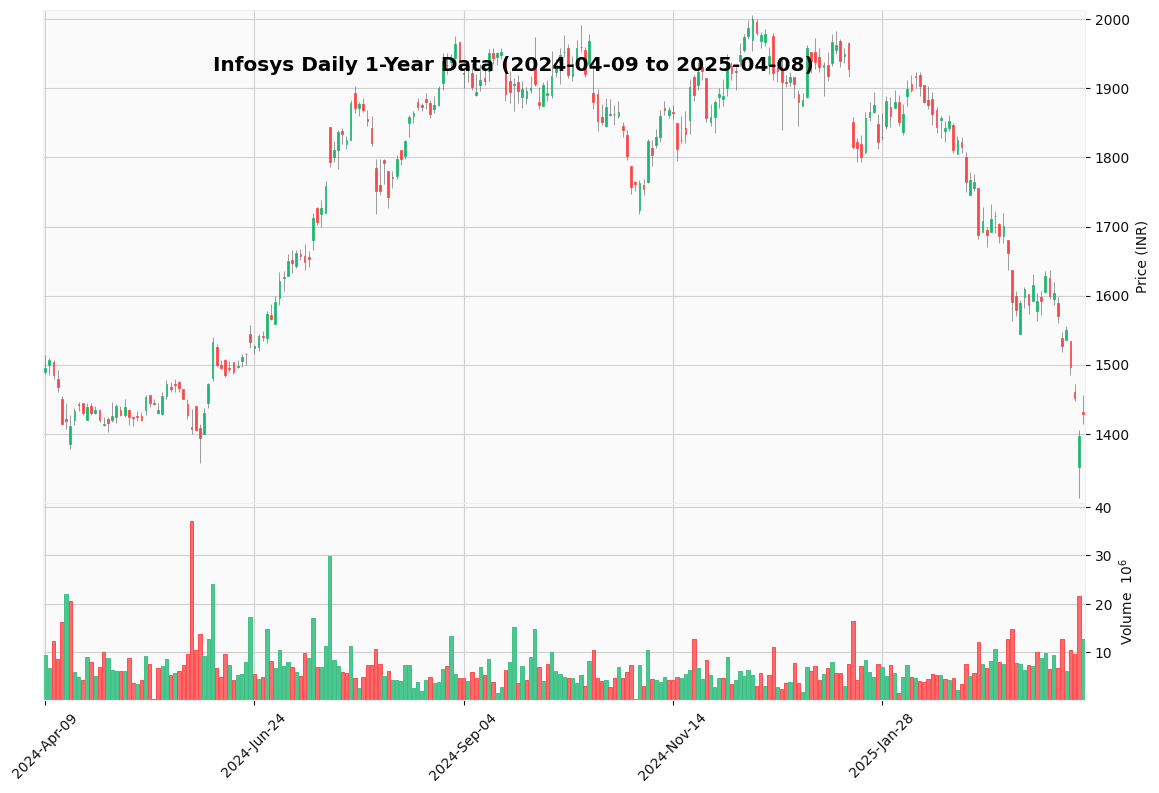

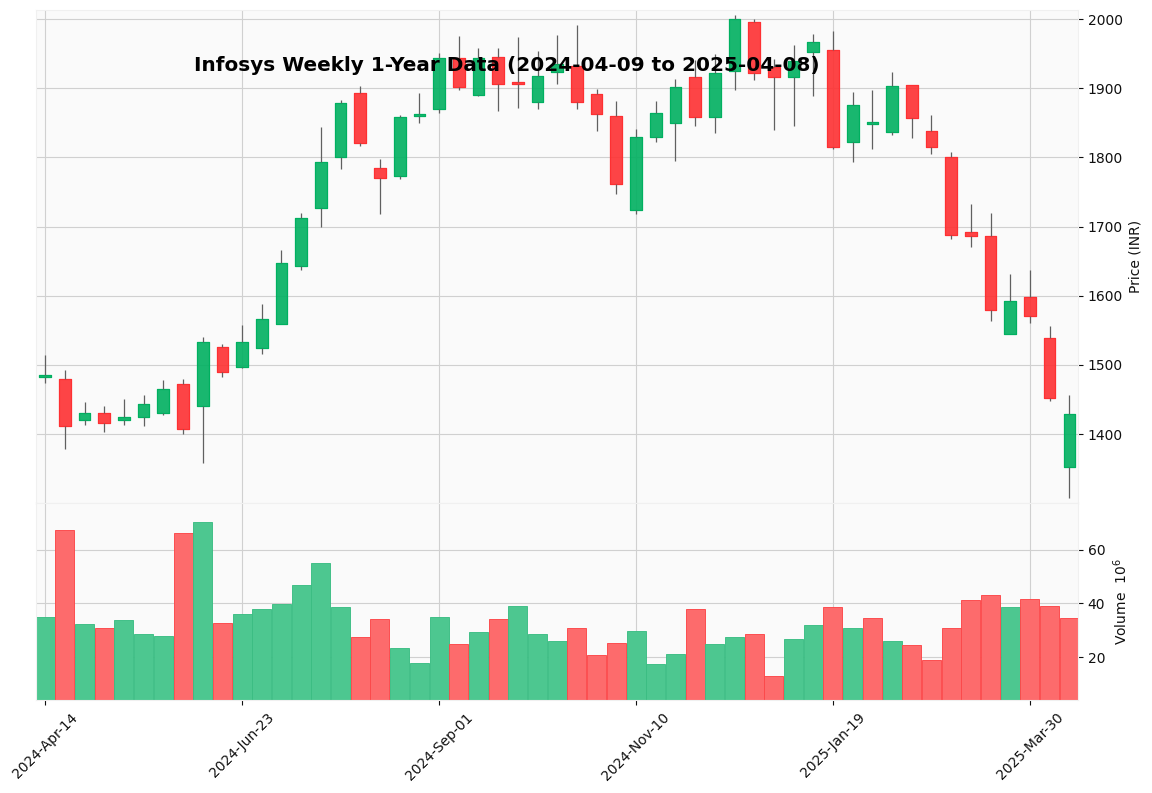

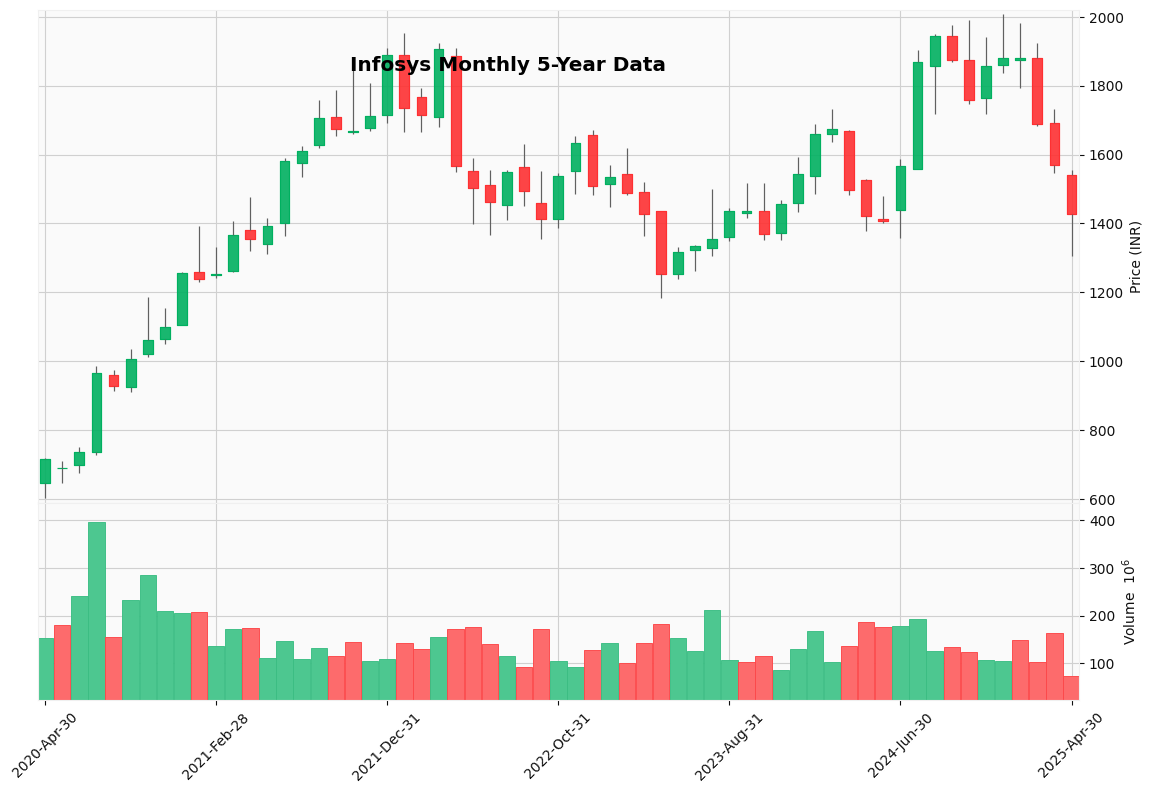

In [7]:
# 1. Daily 1-Year Data
mpf.plot(
    daily_1year_data,
    type='candle',
    style='yahoo',
    title='Infosys Daily 1-Year Data (2024-04-09 to 2025-04-08)',
    ylabel='Price (INR)',
    volume=True,
    figsize=(12, 8),
    tight_layout=True
)

# 2. Weekly 1-Year Data
mpf.plot(
    weekly_1year_data,
    type='candle',
    style='yahoo',
    title='Infosys Weekly 1-Year Data (2024-04-09 to 2025-04-08)',
    ylabel='Price (INR)',
    volume=True,
    figsize=(12, 8),
    tight_layout=True
)

# 3. Monthly 5-Year Data
mpf.plot(
    monthly_5years_data,
    type='candle',
    style='yahoo',
    title='Infosys Monthly 5-Year Data',
    ylabel='Price (INR)',
    volume=True,
    figsize=(12, 8),
    tight_layout=True
)